<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01163204/blob/main/Reto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nombre: Juan Carlos Torres Luna
#Matricula: A01163204
#Ciencia y analítica de datos (Gpo 10)
#Reto 10

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from shapely.geometry import Point
import geopandas as gpd

## Limpieza de base de datos

In [2]:
df = pd.read_csv("/content/data.csv", encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', pd.get_option("display.max_columns"))
df.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [3]:
df.shape

(1068, 57)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [5]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [6]:
df.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [7]:
ndf1 = df.copy()

In [8]:
ndf1 = ndf1.drop('CLAVE', axis=1)
ndf1 = ndf1.drop('SDT_mg/L', axis=1)

In [9]:
ndf1.isna().sum()

SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN          

In [ ]:
# ALC_mg/L
# CALIDAD_ALC
# CONDUCT_mS/cm             
# CALIDAD_CONDUC            
# SDT_M_mg/L                
# CALIDAD_SDT_ra            
# CALIDAD_SDT_salin
# DUR_mg/L                  
# CALIDAD_DUR 
# N_NO3_mg/L                
# CALIDAD_N_NO3 
# CONTAMINANTES                        

In [10]:
ndf1['ALC_mg/L'].value_counts()
ndf1['CALIDAD_ALC'].value_counts()
ndf1['CONDUCT_mS/cm'].value_counts()            
ndf1['CALIDAD_CONDUC'].value_counts()           
ndf1['SDT_M_mg/L'].value_counts()                
ndf1['CALIDAD_SDT_ra'].value_counts()            
ndf1['CALIDAD_SDT_salin'].value_counts()
ndf1['DUR_mg/L'].value_counts()                  
ndf1['CALIDAD_DUR'].value_counts() 
ndf1['N_NO3_mg/L'].value_counts()                
ndf1['CALIDAD_N_NO3'].value_counts() 
ndf1['CONTAMINANTES'].value_counts() 

FLUO,                                            78
DT,                                              65
FLUO,AS,                                         51
CF,                                              31
AS,                                              31
                                                 ..
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,               1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,     1
PB,MN,FE,                                         1
ALC,AS,FE,                                        1
ALC,DT,NO3,                                       1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [11]:
ALC_mg_median = ndf1['ALC_mg/L'].median()
CONDUCT_mS_median = ndf1['CONDUCT_mS/cm'].median()  
print(ALC_mg_median)
print(CONDUCT_mS_median)

215.5275
815.0


In [12]:
CALIDAD_ALC_mode = ndf1['CALIDAD_ALC'].mode() 
CALIDAD_CONDUC_mode = ndf1['CALIDAD_CONDUC'].mode()          
SDT_M_mg_mode = ndf1['SDT_M_mg/L'].mode()               
CALIDAD_SDT_ra_mode = ndf1['CALIDAD_SDT_ra'].mode()           
CALIDAD_SDT_salin_mode = ndf1['CALIDAD_SDT_salin'].mode()
DUR_mg_mode = ndf1['DUR_mg/L'].mode()                
CALIDAD_DUR_mode = ndf1['CALIDAD_DUR'].mode() 
N_NO3_mg_mode = ndf1['N_NO3_mg/L'].mode()                
CALIDAD_N_NO3_mode = ndf1['CALIDAD_N_NO3'].mode()
CONTAMINANTES_mode = ndf1['CONTAMINANTES'].mode()

print(CALIDAD_ALC_mode)
print(CALIDAD_CONDUC_mode)
print(SDT_M_mg_mode)
print(CALIDAD_SDT_ra_mode)
print(CALIDAD_SDT_salin_mode)
print(DUR_mg_mode)
print(CALIDAD_DUR_mode)
print(N_NO3_mg_mode)
print(CALIDAD_N_NO3_mode)
print(CONTAMINANTES_mode)

0    Alta
dtype: object
0    Permisible para riego
dtype: object
0    292
1    317
2    320
3    380
4    496
dtype: object
0    Excelente para riego
dtype: object
0    Potable - Dulce
dtype: object
0    <20
dtype: object
0    Potable - Dura
dtype: object
0    <0.02
dtype: object
0    Potable - Excelente
dtype: object
0    FLUO,
dtype: object


In [13]:
ndf2 = ndf1.copy()

In [14]:
ndf2['ALC_mg/L'].fillna(value = ALC_mg_median, inplace = True)
ndf2['CALIDAD_ALC'].fillna(value = CALIDAD_ALC_mode[0], inplace = True)
ndf2['CONDUCT_mS/cm'].fillna(value = CONDUCT_mS_median, inplace = True)           
ndf2['CALIDAD_CONDUC'].fillna(value = CALIDAD_CONDUC_mode[0], inplace = True)          
ndf2['SDT_M_mg/L'].fillna(value = SDT_M_mg_mode[0], inplace = True)              
ndf2['CALIDAD_SDT_ra'].fillna(value = CALIDAD_SDT_ra_mode[0], inplace = True)           
ndf2['CALIDAD_SDT_salin'].fillna(value = CALIDAD_SDT_salin_mode[0], inplace = True)
ndf2['DUR_mg/L'].fillna(value = DUR_mg_mode[0], inplace = True)                 
ndf2['CALIDAD_DUR'].fillna(value = CALIDAD_DUR_mode[0], inplace = True)
ndf2['N_NO3_mg/L'].fillna(value = N_NO3_mg_mode[0], inplace = True)               
ndf2['CALIDAD_N_NO3'].fillna(value = CALIDAD_N_NO3_mode[0], inplace = True)

In [15]:
ndf2['CONTAMINANTES'].fillna(value = 'X', inplace = True)

In [16]:
ndf2

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,256.000,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,330.690,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,193.140,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [17]:
ndf2.isna().sum()

SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO    

## Exploracion de datos

In [18]:
print(ndf2['ALC_mg/L'].value_counts())
print(ndf2['CALIDAD_ALC'].value_counts())
print(ndf2['CONDUCT_mS/cm'].value_counts())            
print(ndf2['CALIDAD_CONDUC'].value_counts())           
print(ndf2['SDT_M_mg/L'].value_counts())                
print(ndf2['CALIDAD_SDT_ra'].value_counts())            
print(ndf2['CALIDAD_SDT_salin'].value_counts())
print(ndf2['DUR_mg/L'].value_counts())                
print(ndf2['CALIDAD_DUR'].value_counts()) 
print(ndf2['N_NO3_mg/L'].value_counts())                
print(ndf2['CALIDAD_N_NO3'].value_counts()) 
print(ndf2['CONTAMINANTES'].value_counts()) 

157.620    5
168.720    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 817, dtype: int64
Alta                    798
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64
815.0    6
777.0    6
577.0    4
308.0    4
454.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 802, dtype: int64
Permisible para riego    466
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64
292         6
496         4
320         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
Excelente para riego            493
Cultivos sensibles              343
Cultivos con manejo especial    161
Cultivos tolerant

In [19]:
cols = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

In [20]:
ndf2[cols] = ndf2[cols].replace({'<':''}, regex = True)

In [21]:
print(ndf2['ALC_mg/L'].value_counts())
print(ndf2['CALIDAD_ALC'].value_counts())
print(ndf2['CONDUCT_mS/cm'].value_counts())            
print(ndf2['CALIDAD_CONDUC'].value_counts())           
print(ndf2['SDT_M_mg/L'].value_counts())                
print(ndf2['CALIDAD_SDT_ra'].value_counts())            
print(ndf2['CALIDAD_SDT_salin'].value_counts())
print(ndf2['DUR_mg/L'].value_counts())                
print(ndf2['CALIDAD_DUR'].value_counts()) 
print(ndf2['N_NO3_mg/L'].value_counts())                
print(ndf2['CALIDAD_N_NO3'].value_counts()) 
print(ndf2['CONTAMINANTES'].value_counts()) 

157.620    5
168.720    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 817, dtype: int64
Alta                    798
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64
815.0    6
777.0    6
577.0    4
308.0    4
454.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 802, dtype: int64
Permisible para riego    466
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64
292         6
496         4
320         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
Excelente para riego            493
Cultivos sensibles              343
Cultivos con manejo especial    161
Cultivos tolerant

In [22]:
print(ndf2['SEMAFORO'].value_counts()) 

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64


In [23]:
ndf2['SEMAFORO'] = ndf2['SEMAFORO'].replace({'Verde':'1', 'Amarillo': '2', 'Rojo':'3'}, regex = True)

In [24]:
print(ndf2['SEMAFORO'].value_counts()) 

1    434
3    387
2    247
Name: SEMAFORO, dtype: int64


In [25]:
numerical = [
    "ALC_mg/L",
    "SDT_M_mg/L",
    'FLUORUROS_mg/L',
    'DUR_mg/L',  
    'COLI_FEC_NMP/100_mL',
    'N_NO3_mg/L',
    'AS_TOT_mg/L',
    'CD_TOT_mg/L',
    'CR_TOT_mg/L',
    'HG_TOT_mg/L',
    'PB_TOT_mg/L',
    'MN_TOT_mg/L',
    'FE_TOT_mg/L',
    'SEMAFORO'
]

categorical = [
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO', 
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE'
]

extra = ['CONTAMINANTES']

In [26]:
ndf2[numerical] = ndf2[numerical].astype('float')
ndf2[categorical] = ndf2[categorical].astype('category')

In [27]:
ndf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SITIO                 1068 non-null   object  
 1   ORGANISMO_DE_CUENCA   1068 non-null   object  
 2   ESTADO                1068 non-null   object  
 3   MUNICIPIO             1068 non-null   object  
 4   ACUIFERO              1068 non-null   object  
 5   SUBTIPO               1068 non-null   category
 6   LONGITUD              1068 non-null   float64 
 7   LATITUD               1068 non-null   float64 
 8   PERIODO               1068 non-null   int64   
 9   ALC_mg/L              1068 non-null   float64 
 10  CALIDAD_ALC           1068 non-null   category
 11  CONDUCT_mS/cm         1068 non-null   float64 
 12  CALIDAD_CONDUC        1068 non-null   category
 13  SDT_M_mg/L            1068 non-null   float64 
 14  CALIDAD_SDT_ra        1068 non-null   category
 15  CALI

In [28]:
ndf2.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052,894.970290,1.075600,347.631015,355.490356,4.315733,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387,1.955993
std,6.703263,3.887670,0.0,116.661485,1242.292889,2749.074810,1.924278,359.640893,2052.457014,8.342260,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974,0.876076
min,-116.664250,14.561150,2020.0,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.383325,0.267175,120.956900,1.100000,0.646229,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,548.600000,0.503500,245.175900,1.100000,2.080766,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,2.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380,3.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc8ed79890>,
      dtype=object)

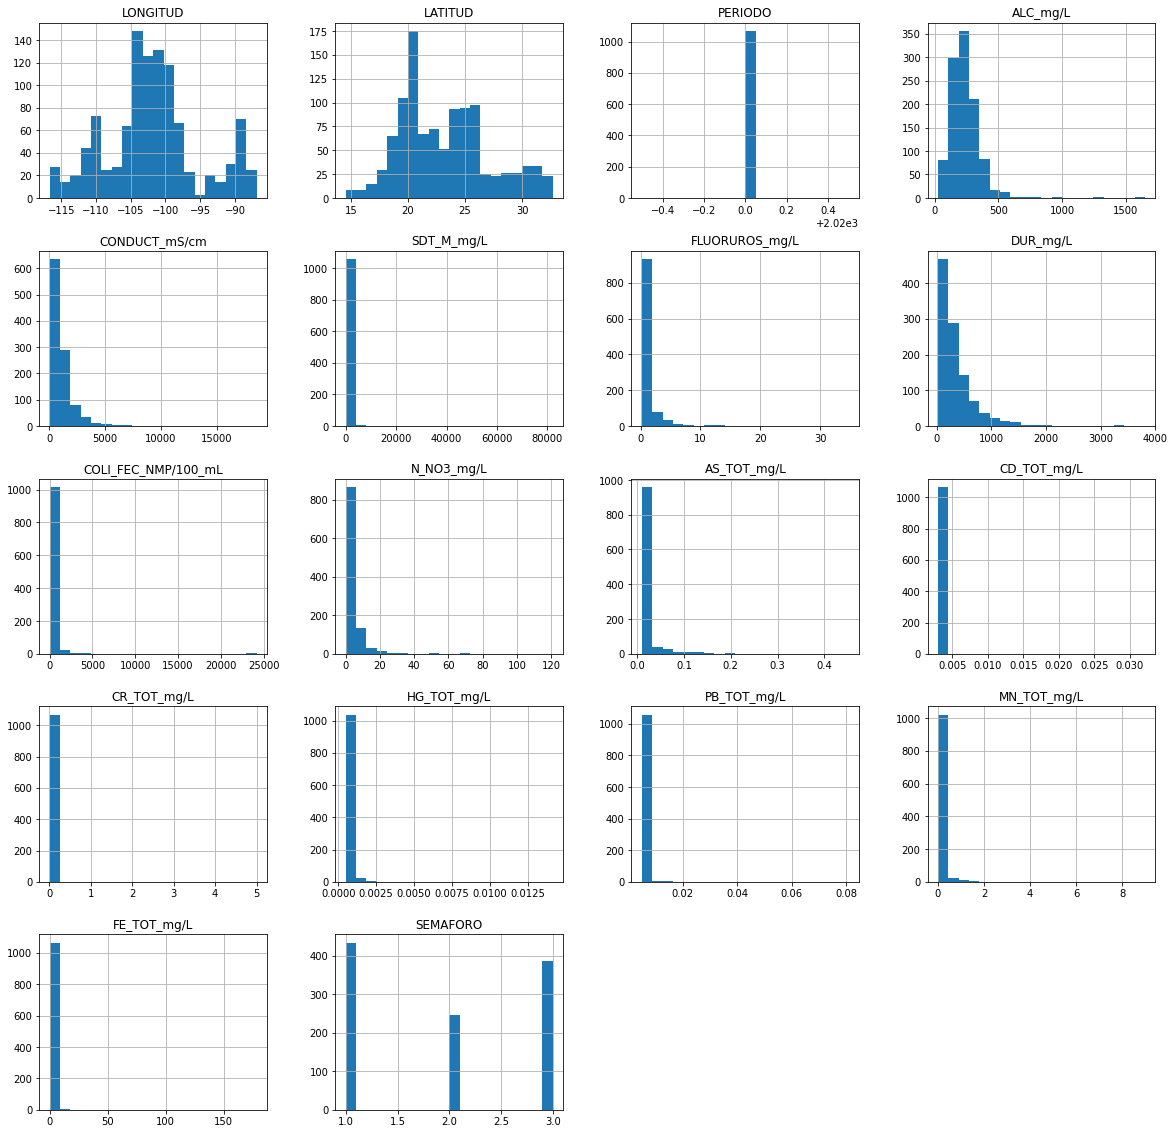

In [29]:
ndf2.hist(bins=20, figsize=(20,20))


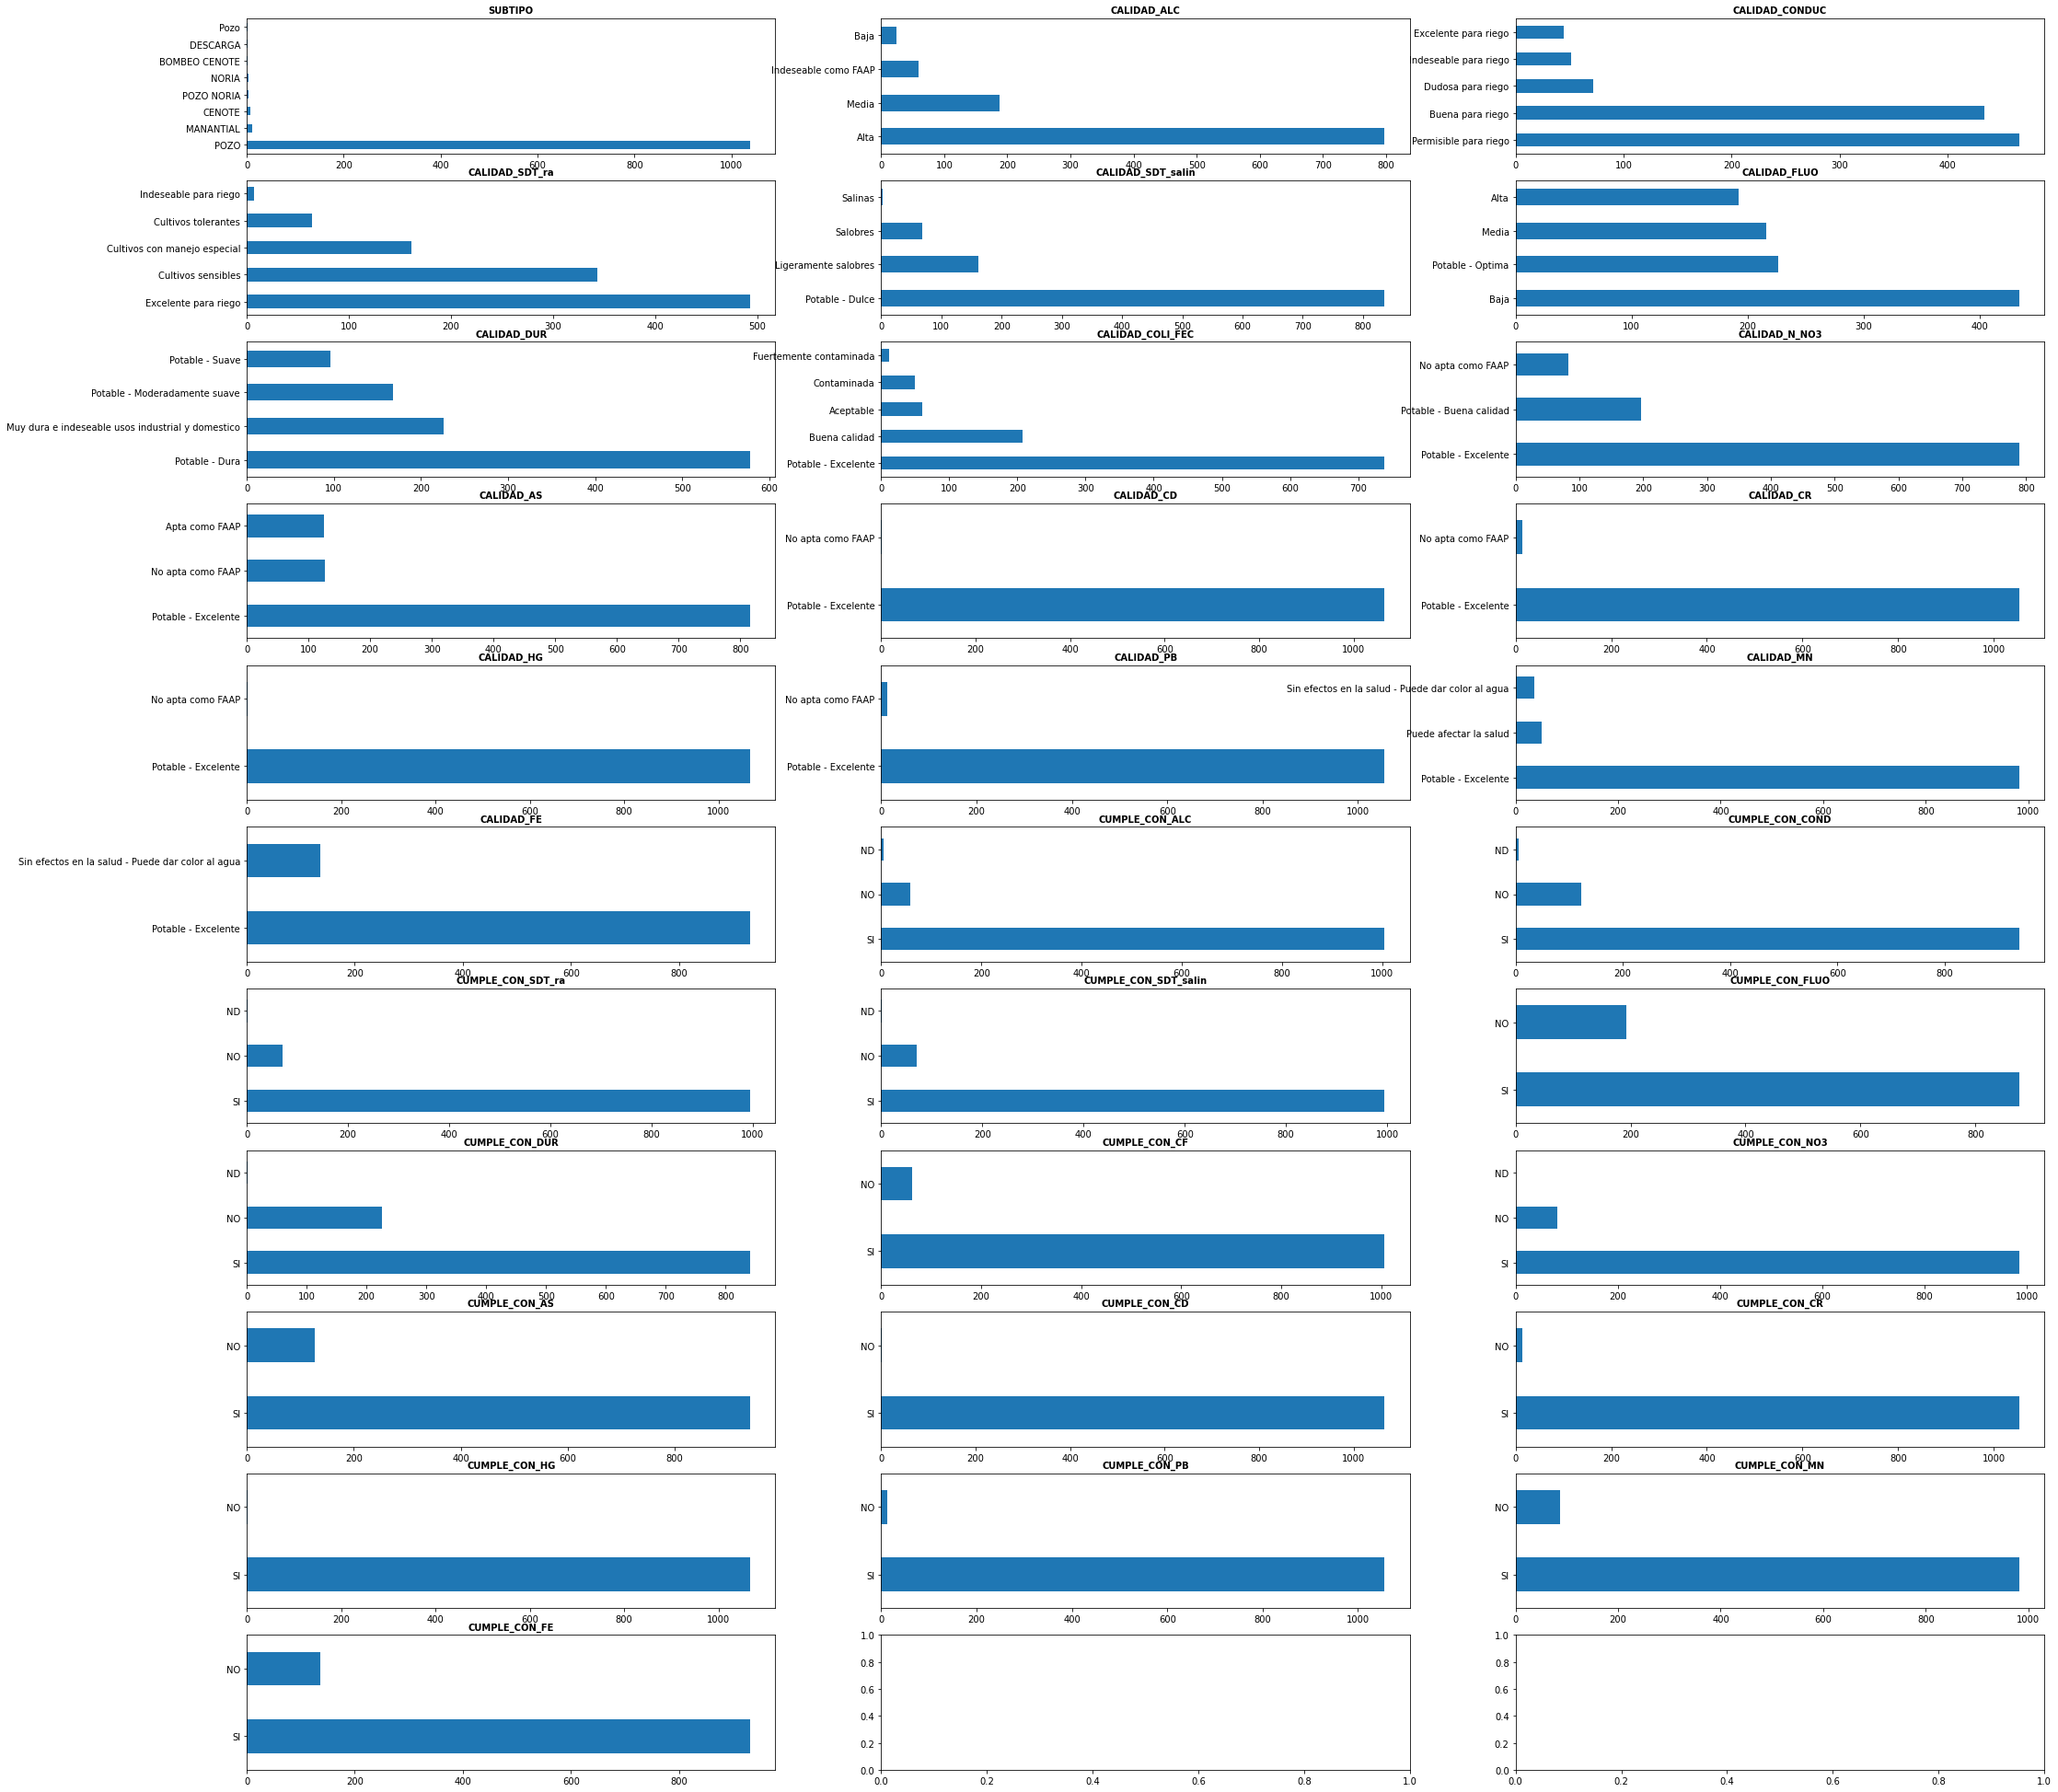

In [43]:
fig, ax = plt.subplots(11, 3, figsize=(35, 35))
ax = ax.flat

for i, col in enumerate(categorical):
  ndf2[col].value_counts().plot.barh(ax = ax[i])
  ax[i].set_title(col, fontsize = 10, fontweight = "bold")
  ax[i].tick_params(labelsize = 10)
  
plt.show()

[]

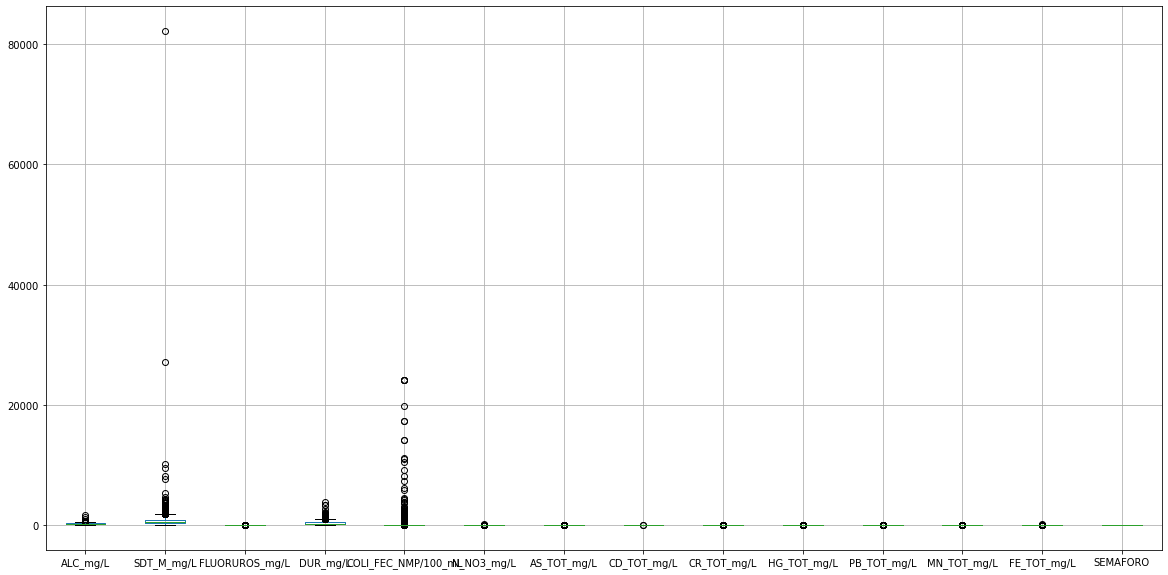

In [51]:
bp = ndf2.boxplot(figsize=(20, 10), column = numerical, labels=numerical)
bp.plot()

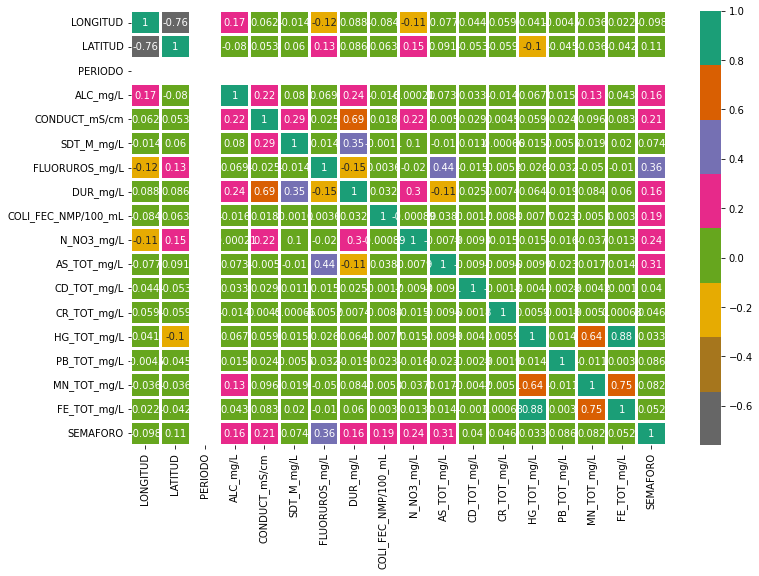

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(ndf2.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

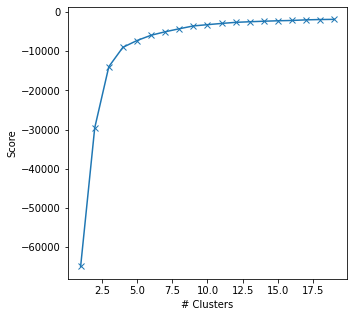

In [65]:
S = ndf2[["LONGITUD", "LATITUD", "SEMAFORO"]]

clusters = range(1,20)
kmeans = [KMeans(i) for i in clusters]
score = [kmeans[i].fit(S).score(S) for i in range(len(kmeans))]
plt.subplots(figsize=(5,5))
plt.plot(clusters,score,marker='x')
plt.xlabel('# Clusters')
plt.ylabel('Score')
plt.show()

In [82]:
ndf3 = ndf2.copy()

## Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [85]:
ndf3["Coordinates"] = list(zip(ndf2.LONGITUD, ndf2.LATITUD))
ndf3["Coordinates"] = ndf3["Coordinates"].apply(Point)

In [73]:
coordinates = list(zip(ndf2.LONGITUD, ndf2.LATITUD))

In [91]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
MexicoMap = world.query("name == 'Mexico'")

In [104]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(S)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(S)
centers = kmeans.cluster_centers_

In [105]:
ndf4 = pd.DataFrame(centers)
ndf4["Coordinates"] = list(zip(ndf4[0], ndf4[1]))
ndf4["Coordinates"] = ndf4["Coordinates"].apply(Point)

In [106]:
geo = gpd.GeoDataFrame(ndf3, geometry="Coordinates")
geo2 = gpd.GeoDataFrame(ndf4, geometry="Coordinates")

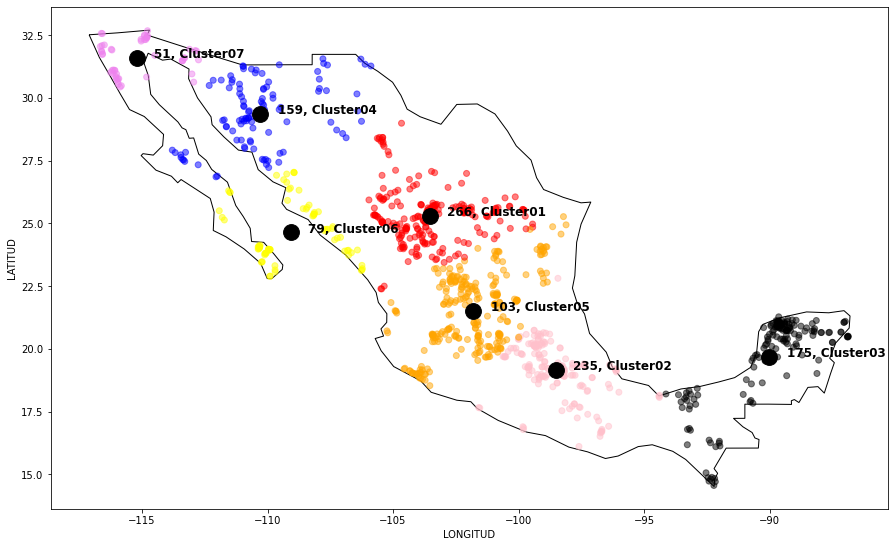

In [114]:
fig, ax = plt.subplots(figsize=(15,10))

colors = ['red', 'pink', 'black', 'blue', 'orange', 'yellow', 'violet']
cm = []

for row in labels:
  cm.append(colors[row])

MexicoMap.plot(ax = ax, edgecolor='black', color='white')
geo.plot(ax = ax, color=cm, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=250, alpha=1)

cluster_labels = ["Cluster01", "Cluster02", "Cluster03",  "Cluster04", "Cluster05", "Cluster06",  "Cluster07"]
lst = pd.DataFrame(labels).value_counts().to_list()
for i, txt in enumerate(lst):
    plt.annotate(
        str(txt)+ ", " + cluster_labels[i], 
        (centroids[i,0], centroids[i,1]), 
        xytext=(centroids[i,0]+0.7, centroids[i,1]), 
        fontsize = 12, 
        fontweight = "bold"
    ) 

ax.set_xlabel('LONGITUD')
ax.set_ylabel("LATITUD")

plt.show()

- Comparando la gráfica entre puntaje y el numero de clústeres, el mejor puntaje obtenido fue al utilizar entre 6 y 7 clústeres.
- Se pudo agrupar en 7 grupos para el análisis de la calidad de agua subterráneas utilizando la longitud, la latitud y el semáforo indicado.
- En nuestro mapa se puede apreciar el los grupos están equilibrados de forma que cada grupo tiene un balance coherente comparado con los otros.
